# UnB em Dados - IEEE Trainee S1

Durante a Semana 1 do processo Trainee do IEEE objetivou-se aplicar alguns conceitos introdutórios de Análise de Dados em Python para em um dataset de escolha livre.

Minha escolha foi o dataset gastos-por-unidade-06-2023.csv, que apresenta uma compilação dos gastos das instituições e unidades acadêmicas da UnB. Esse dataset, assim como vários outros relacionados a UnB estão disponíveis no site http://dados.unb.br/

Primeiramente, foram levantas as seguintes perguntas a serem respondidas:

- Quais as unidades que mais consumiram recursos no período da análise?

- Quais as principais finalidades (natureza da despesa)?

- Qual dos cursos(faculdades) gastou maior verba no período?

- Analisando as Engenharias, qual delas consumiu maior verba?

- Seria possível estimar os gastos dos anos seguintes com base nos dados passados?

Sendo assim, vamos começar a análise, sendo o primeiro passo o de pré-processamento dos dados:

In [1]:
#Inicialização e instalação das dependências necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-processamento dos Datasets

Para o pré-processamento foram removidos os símbolos financeiros (R$) dos valores, de forma a transformá-los em unicamente numéricos. Também foi criado um dataset com o união dos dados de 2021 até 2023, para os meses que dispõem de dados.

In [2]:
def organize(path):
    result = pd.read_csv(path)
    result['valor'] = result['valor'].str.replace('.','', regex=False).str.replace('$','',regex=False).str.replace('R','',regex=False).str.replace(' ','',regex=False).str.replace(',','.',regex=False)
    result['valor'] = result['valor'].astype('float')
    result['periodo'] = path[-8:-4] + "-" + path[-11:-9]
    return result

#2021
df21_07 = organize('db_gastos/gastos-por-unidade-07-2021.csv')
df21_08 = organize('db_gastos/gastos-por-unidade-08-2021.csv')
df21_09 = organize('db_gastos/gastos-por-unidade-09-2021.csv')
df21_10 = organize('db_gastos/gastos-por-unidade-10-2021.csv')

#2022
df22_02 = organize('db_gastos/gastos-por-unidade-02-2022.csv')
df22_03 = organize('db_gastos/gastos-por-unidade-03-2022.csv')
df22_05 = organize('db_gastos/gastos-por-unidade-05-2022.csv')
df22_06 = organize('db_gastos/gastos-por-unidade-06-2022.csv')
df22_07 = organize('db_gastos/gastos-por-unidade-07-2022.csv')

#2023
df23_03 = organize('db_gastos/gastos-por-unidade-03-2023.csv')
df23_04 = organize('db_gastos/gastos-por-unidade-04-2023.csv')
df23_05 = organize('db_gastos/gastos-por-unidade-05-2023.csv')

#Unindo os datasets
df_gastos = pd.concat([df21_07,df21_08,df21_09,df21_10,df22_02,df22_03,df22_05,df22_06,df22_07,df23_03,df23_04,df23_05], ignore_index=True)
df_gastos

,natureza_despesa,id_unidade,valor,unidade,periodo
0,SERV. PESSOA JURÍDICA,757,303365.04,ARQUIVO CENTRAL/DIRECAO,2021-07
1,MAT. CONSUMO,757,68955.81,ARQUIVO CENTRAL/DIRECAO,2021-07
2,EQUIP. MATERIAL PERMANENTE,757,57365.99,ARQUIVO CENTRAL/DIRECAO,2021-07
3,EXERCÍCIOS ANTERIORES - 1,757,580613.66,ARQUIVO CENTRAL/DIRECAO,2021-07
4,SERVIÇOS / UG-GESTÃO,757,1348351.34,ARQUIVO CENTRAL/DIRECAO,2021-07
...,...,...,...,...,...
19358,EQUIP. MATERIAL PERMANENTE,77,344677.21,VICE-REITORIA,2023-05
19359,CUSTEIO,77,2350825.98,VICE-REITORIA,2023-05
19360,PASSAGENS,77,260886.66,VICE-REITORIA,2023-05
19361,SERV. PESSOA FÍSICA,77,6015.70,VICE-REITORIA,2023-05


# 1.1 - Quais as unidades que mais consumiram recursos no período total da análise?

In [3]:
df_total_unidade = df_gastos.groupby('unidade',as_index=False).sum('valor').sort_values(by=['valor'],ascending=False)
df_total_unidade.head()

,unidade,id_unidade,valor
85,DGP - FOLHA DE PAGAMENTO,228384,4.083898e+10
464,UNIVERSIDADE DE BRASÍLIA,114950,1.828887e+10
131,FUNDAÇÃO UNIVERSIDADE DE BRASÍLIA,73810,8.286598e+09
95,DIRETORIA DE CONTRATOS ADMINISTRATIVOS,68220,5.287260e+09
165,PREFEITURA DA UNB,15470,2.963550e+09


Ao avaliar o período total, podemos perceber que os maiores gatos da UnB foram em relação à folha de pagamentos e gastos de mantenimento da infraestrutura da Universidade.

# 1.1 - Quais as principais finalidades (natureza da despesas)?

In [4]:
df_natureza = df_gastos.groupby(['unidade','natureza_despesa'], as_index=False)['valor'].sum()
df_natureza.sort_values(by=['valor'],ascending=False)

,unidade,natureza_despesa,valor
588,DGP - FOLHA DE PAGAMENTO,VENCIMENTOS E VANTAGENS FIXAS - PESSOAL CIVIL ...,1.619491e+10
1993,UNIVERSIDADE DE BRASÍLIA,CUSTEIO,9.630234e+09
565,DGP - FOLHA DE PAGAMENTO,"APOSENT.RPPS, RESER.REMUNER. E REFOR.MILITAR (...",9.073276e+09
578,DGP - FOLHA DE PAGAMENTO,OBRIGAÇÕES PATRONAIS - OP. INTRA-ORÇAMENTÁRIAS,5.473515e+09
584,DGP - FOLHA DE PAGAMENTO,SENTENÇAS JUDICIAIS,5.140896e+09
...,...,...,...
1973,TED TESTE,PASSAGENS,1.200000e+02
153,COORDENACAO DE ALMOXARIFADO,EQUIPAMENTOS E MATERIAL PERMANENTE,8.979000e+01
899,FACULDADE DO GAMA,OBRIGAÇÕES PATRONAIS,4.800000e+00
1587,SECRETARIA DE PATRIMÔNIO IMOBILIÁRIO,OBRIGAÇÕES CONTRIBUTIVAS,9.000000e-02


Ao avaliar o período total, podemos perceber que os maiores gatos da UnB foram em relação à folha de pagamentos e gastos de mantenimento da infraestrutura da Universidade.

# 1.2 - Qual dos cursos(faculdades) gastou maior verba no período?

In [5]:
filtro = (df_gastos['unidade'].str.contains('DEPTO|FACULDADE|DEPARTAMENTO|INSTITUTO', regex=True))
df_faculdades = df_gastos[filtro].groupby(['unidade'], as_index=False)['valor'].sum()
df_faculdades.sort_values(by=['valor'],ascending=False).reset_index(drop=True).head(15)

,unidade,valor
0,FACULDADE DE MEDICINA,2.880421e+08
1,FACULDADE DE CIÊNCIAS DA SAÚDE,2.852755e+08
2,"FACULDADE ECONOMIA, ADMINISTRAÇÃO, CONTABILI...",2.842886e+08
3,FACULDADE DE PLANALTINA,2.768044e+08
4,FACULDADE DE CEILÂNDIA,2.197602e+08
5,FACULDADE DE EDUCAÇÃO FÍSICA,1.902891e+08
6,FACULDADE DE TECNOLOGIA,1.779025e+08
7,INSTITUTO DE GEOCIÊNCIAS,1.777242e+08
8,INSTITUTO DE CIÊNCIAS BIOLÓGICAS,1.571295e+08
9,INSTITUTO DE LETRAS,1.498645e+08


As Faculdades de Medicina, Ciências da Saúde e a FACE, lideram o top 3 do Hanking. Dados interessantes que podem ser notados, são que as faculdades inteiras de Planaltina e Ceilândia gastaram menos que as lideres do hacking.

# 1.3 - Analisando as Engenharias, qual delas consumiu maior verba?

In [6]:
filtro = (df_gastos['unidade'].str.contains('ENGENHARIA', regex=True))
df_engenharias = df_gastos[filtro].groupby(['unidade'], as_index=False)['valor'].sum()
df_engenharias.sort_values(by=['valor'],ascending=False).reset_index(drop=True).head(15)

,unidade,valor
0,DEPTO ENGENHARIA ELETRICA,60024945.40
1,PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA ELÉTRICA,2462806.55
2,DEPARTAMENTO DE ENGENHARIA MECANICA,891230.62
3,PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA BIOMÉDICA,757004.68
4,DEPTO ENGENHARIA DE PRODUCAO,433536.92
5,DEPTO ENGENHARIA CIVIL E AMBIENTAL,322399.20
6,DEPTO ENGENHARIA FLORESTAL,157410.84
7,PROGRAMA DE PÓS-GRADUAÇÃO EM ENGENHARIA DE SIS...,120124.80
8,PROGRAMA DE PÓS-GRADUAÇÃO EM INTEGRIDADE DE MA...,57380.00


O departamento de Engenharia Elétrica é o líder do hanking de gastos nesse período.

# 1.4 - Previsão dos custos

O método que será utilizado para tentar prever os custo de 2023 com base nos dados de 2021 e 2022 será a Regressão Linear, já que iremos avaliar apenas o valor total dos gastos de cada mês disponibilizado.

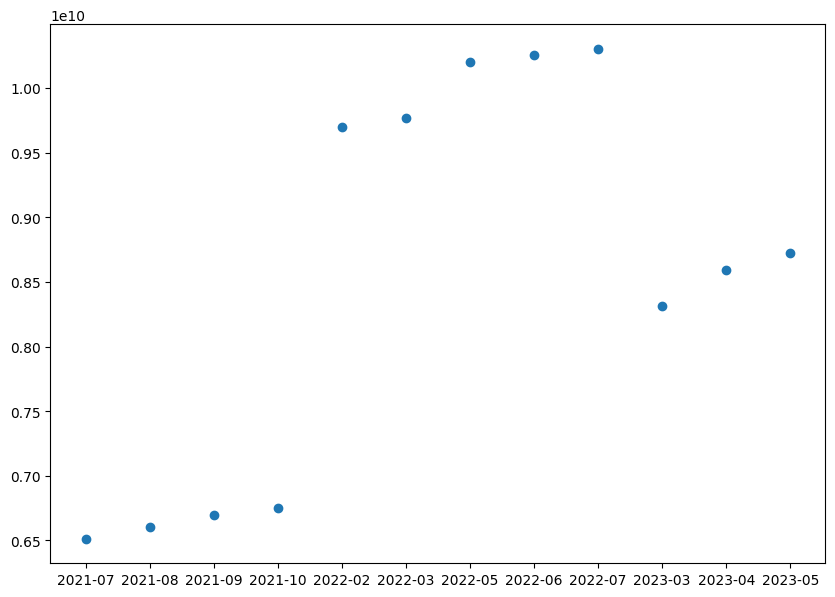

In [31]:
df_total = df_gastos.groupby(['periodo'], as_index=False)['valor'].sum()
plt.figure(figsize=(10,7))
plt.scatter(df_total.periodo, df_total.valor)
plt.show()

Podemos perceber que existe uma discrepância bem grande entre os dados de cada ano, sendo que em 2022 teve uma grande alta. Assim, percebe-se que seriam necessárias mais informações para poder driblar essas mudança brusca e analisar melhor os valores

# Parte 2 - Avaliação do uso de ferramentas de análise de dado e Machine Learning nesse dataset

## 2.1 - Codificação One-Hot

Como vimos, esse dataset apresenta um valor categóricos de extrema importância, que é a natureza da despesa. Contudo para aplicar uma estratégias de Machine Learning nesse dataset, precisaríamos que todos os dados fossem numéricos, para isso seria preciso transformar esses valores categóricos para um equivalente numérico.

## 2.2 - Clusterização

A técnica de Clusterização permite agrupar e categorizar uma grande quantidade de dados, com base em características semelhantes. Aplicar essa abordagem seria muito interessante caso do dataset apresentasse mais detalhadamente informações sobre as despesas, como as datas de solicitação e execução, valor parcelado ou não, forma de pagamento, entre outros. Assim, seria possível avaliar com mais detalhes quais são as despesas que são menos atendidas pelo comissão orçamentária, quais demoram mais para serem aprovadas, como são realizados os pagamentos, etc... 

## 2.3 - Conclusão

Portanto, por meio das análises e perspectivas futuras, foi possível perceber a necessidade de um quantitativo maior de dados para poder extrair maiores informações sobre os gastos da UnB. Como perspectiva futura, seria interessante o treinamento de uma rede neural para poder analisar diariamente os gastos da UnB, com objetivo de poder auxiliar na tomada de decisões e na avaliação de caminhos a serem seguido pelo reitoria da universidade.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5035e523-83e5-4212-bc1c-f484fb40f44e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>